#**AI-Driven Fraud Detection for Digital Payments**

In [2]:
# Importing necessary packages
import pandas as pd
import numpy as np

## visualize your data
import matplotlib.pyplot as plt
import seaborn as sns

# **Mounting Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%cd /content/drive/My Drive/Intelligent Systems

/content/drive/My Drive/Intelligent Systems


# **Loading the necessary dataset**

In [49]:
dataset = pd.read_csv("e payment fraud detection dataset.csv")

# **Step 1- Data Preparation and Analysis:**

**Loading and exploring the dataset**

In [6]:
dataset.tail(24)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362596,741,TRANSFER,48442.88,C1112979339,48442.88,0.0,C2114078084,0.00,0.00,1,0
6362597,741,CASH_OUT,48442.88,C1706094385,48442.88,0.0,C2109905271,513746.19,562189.07,1,0
6362598,742,TRANSFER,4009058.39,C1044665079,4009058.39,0.0,C750074708,0.00,0.00,1,0
6362599,742,CASH_OUT,4009058.39,C1970706589,4009058.39,0.0,C637394241,1229761.96,5238820.34,1,0
6362600,742,TRANSFER,652993.91,C40604503,652993.91,0.0,C1166857907,0.00,0.00,1,0
6362601,742,CASH_OUT,652993.91,C1614818636,652993.91,0.0,C362803701,0.00,652993.91,1,0
6362602,742,TRANSFER,1819543.69,C2089752665,1819543.69,0.0,C112833674,0.00,0.00,1,0
6362603,742,CASH_OUT,1819543.69,C1039979813,1819543.69,0.0,C2078394828,0.00,1819543.69,1,0
6362604,742,TRANSFER,54652.46,C1674778854,54652.46,0.0,C1930074465,0.00,0.00,1,0
6362605,742,CASH_OUT,54652.46,C43545501,54652.46,0.0,C830041824,0.00,54652.46,1,0


In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


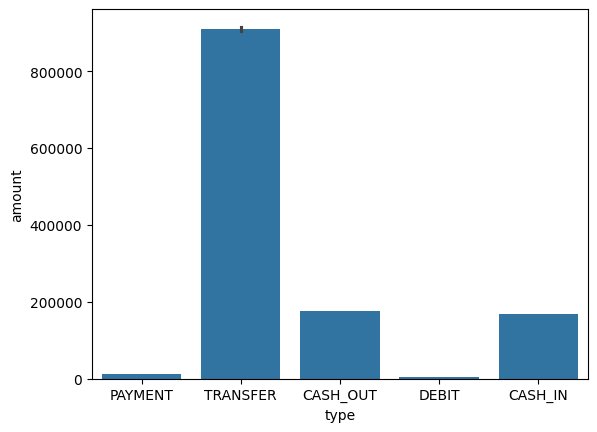

In [53]:
sns.barplot(x='type', y='amount', data=dataset)
plt.show()

<ipython-input-9-ea44ffcc4f95>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


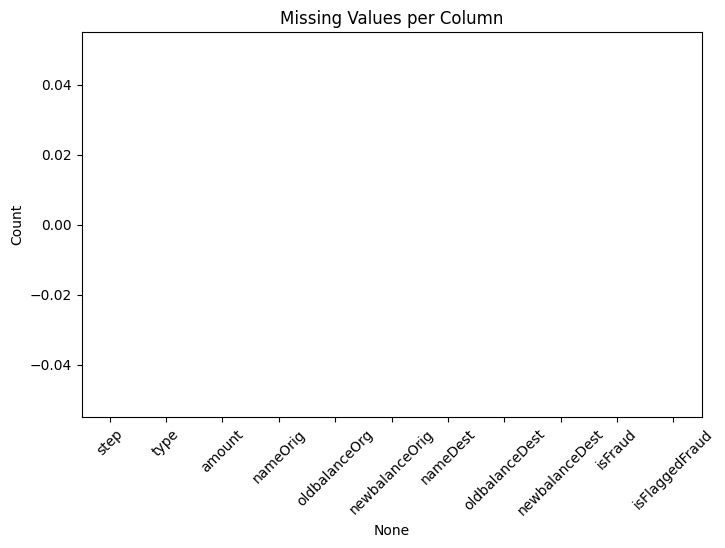

In [9]:
# Check for missing values
missing_values = dataset.isnull().sum()
plt.figure(figsize=(8, 5))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.title("Missing Values per Column")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



**Class distribution (fraud vs non-fraud)**

<ipython-input-10-26cd280a35b2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isFraud', data=dataset, palette="Set2")


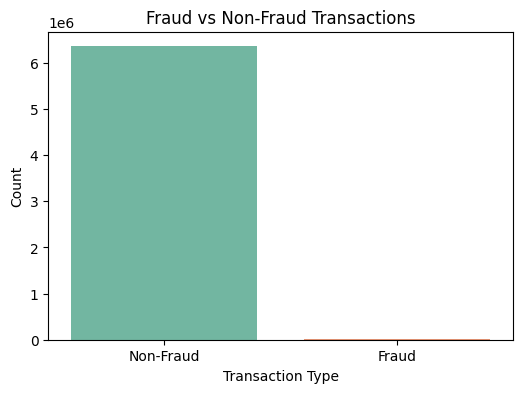

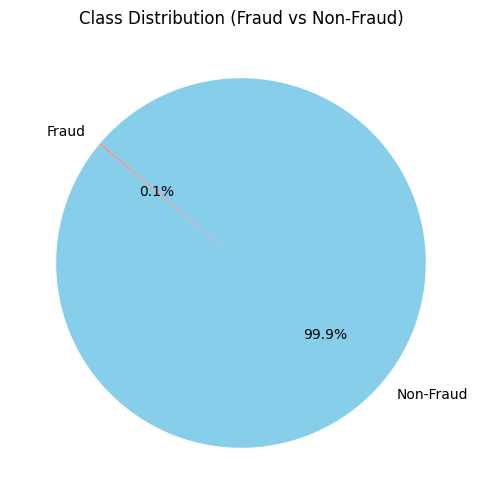

In [10]:
# Class distribution (fraud vs non-fraud)
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=dataset, palette="Set2")
plt.title("Fraud vs Non-Fraud Transactions")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

# Pie chart
fraud_counts = dataset['isFraud'].value_counts()
labels = ['Non-Fraud', 'Fraud']
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.show()


**Transaction amount distribution:**

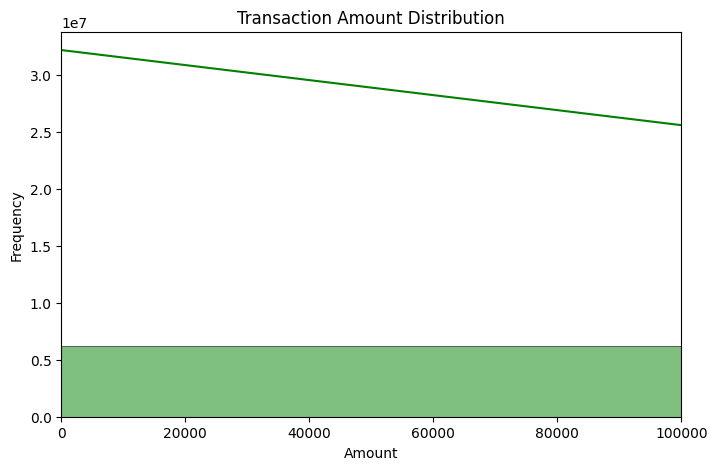

In [11]:
# Transaction amount distribution
plt.figure(figsize=(8, 5))
sns.histplot(dataset['amount'], bins=100, kde=True, color='green')
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.xlim(0, 100000)
plt.show()


**Transaction types and amounts**

<ipython-input-12-5374c98d77ef>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='amount', data=dataset, palette="Set3")


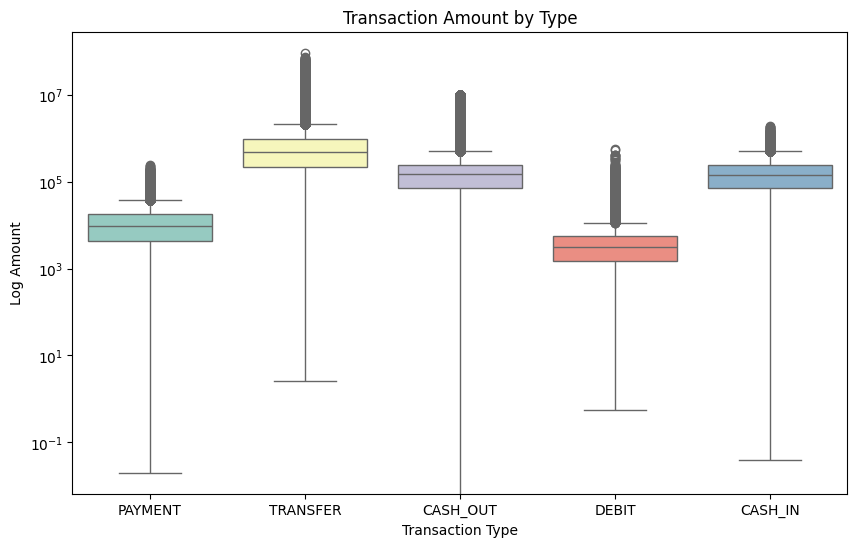

In [12]:
# Transaction types and amounts
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='amount', data=dataset, palette="Set3")
plt.yscale('log')
plt.title("Transaction Amount by Type")
plt.xlabel("Transaction Type")
plt.ylabel("Log Amount")
plt.show()


# **Data Preprocessing**

**1. Drop Unnecessary Columns**

In [7]:
# Remove columns that are not useful for modeling
dataset = dataset.drop(['nameOrig', 'nameDest'], axis=1)


**2. Encode Categorical Features**

In [8]:
from sklearn.preprocessing import LabelEncoder

# Encoding 'type' feature
label_encoder = LabelEncoder()
dataset['type'] = label_encoder.fit_transform(dataset['type'])

# Check the encoded values
print("Encoded transaction types:")
print(dict(enumerate(label_encoder.classes_)))


Encoded transaction types:
{0: 'CASH_IN', 1: 'CASH_OUT', 2: 'DEBIT', 3: 'PAYMENT', 4: 'TRANSFER'}


**3. Check for Outliers**

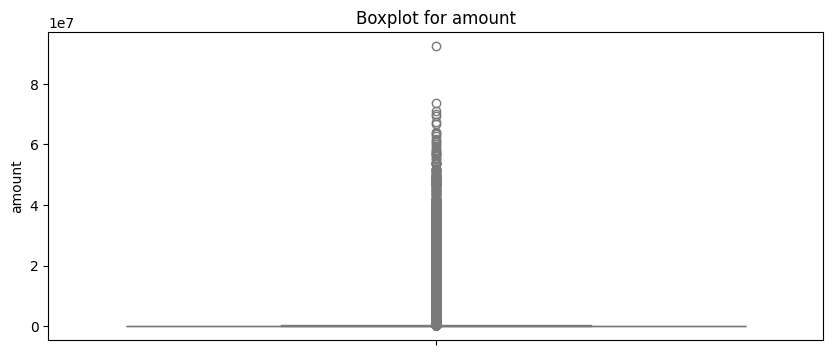

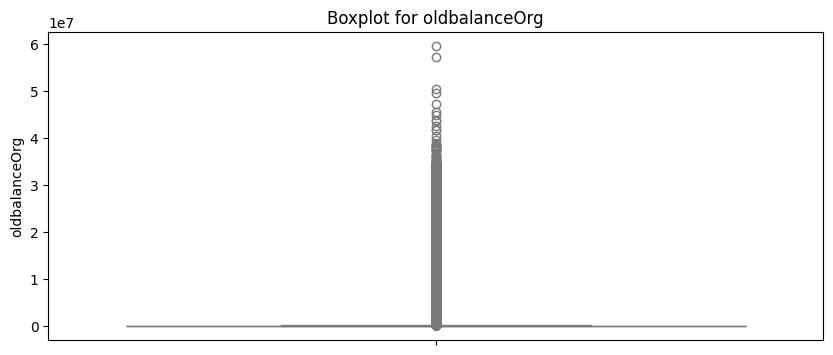

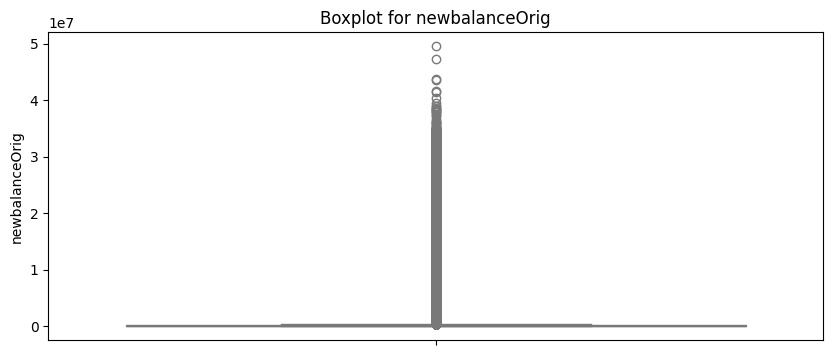

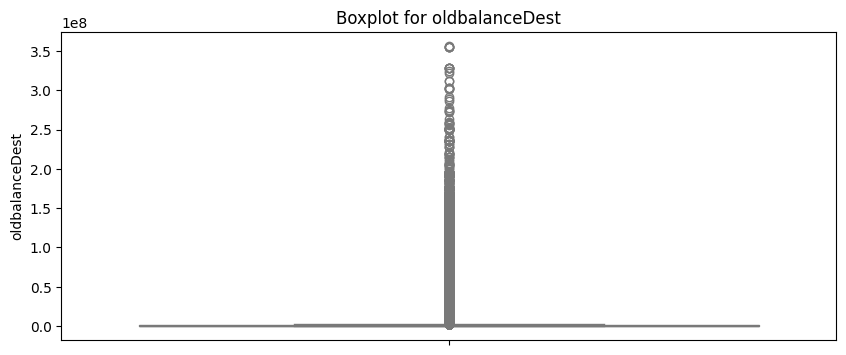

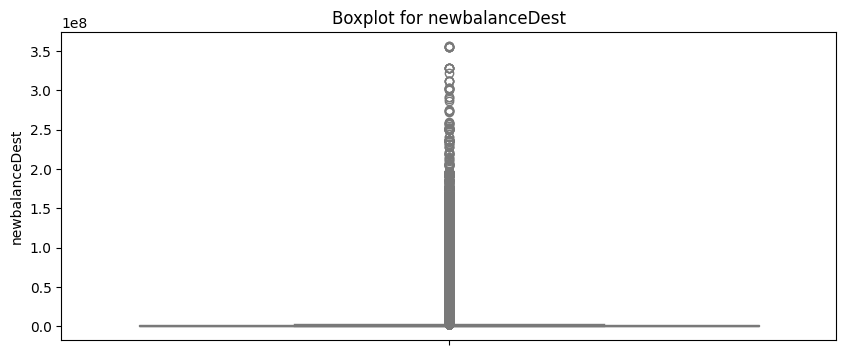

In [9]:
# Visualize outliers in numerical columns
num_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(dataset[col], color='lightblue')
    plt.title(f"Boxplot for {col}")
    plt.show()


**4. Scaling Numerical Features**

In [10]:
from sklearn.preprocessing import StandardScaler

# Scaling numerical features for consistency
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataset[num_cols])

# Replace original columns with scaled values
dataset[num_cols] = scaled_features


**5. Handle Imbalanced Classes**:
The isFraud column is imbalanced. We address this using SMOTE (Synthetic Minority Oversampling Technique).


Class distribution after SMOTE:
isFraud
0    6354407
1    6354407
Name: count, dtype: int64


<ipython-input-11-ba7dea6d8e77>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_balanced, palette="viridis")


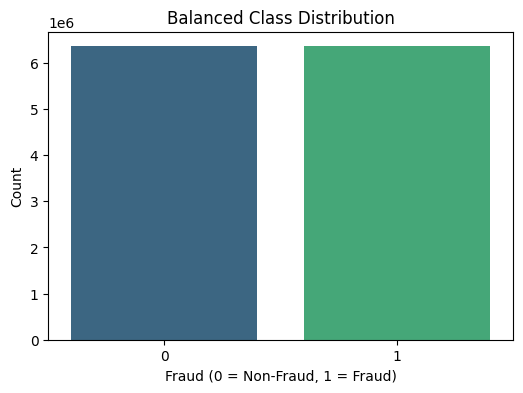

In [11]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = dataset.drop('isFraud', axis=1)
y = dataset['isFraud']

# Balancing dataset using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Check the new class distribution
print("Class distribution after SMOTE:")
print(pd.Series(y_balanced).value_counts())

# Visualization of balanced data
plt.figure(figsize=(6, 4))
sns.countplot(x=y_balanced, palette="viridis")
plt.title("Balanced Class Distribution")
plt.xlabel("Fraud (0 = Non-Fraud, 1 = Fraud)")
plt.ylabel("Count")
plt.show()


**6. Split Data into Training and Testing Sets**

In [12]:
from sklearn.model_selection import train_test_split

# Split the balanced dataset
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Display dataset sizes
print(f"Training data shape: {X_train.shape}, Testing data shape: {X_test.shape}")
print(f"Fraud cases in training: {sum(y_train)}, Fraud cases in testing: {sum(y_test)}")


Training data shape: (10167051, 8), Testing data shape: (2541763, 8)
Fraud cases in training: 5083481, Fraud cases in testing: 1270926


# **3. Correlation and Relationships**

**Correlation heatmap**

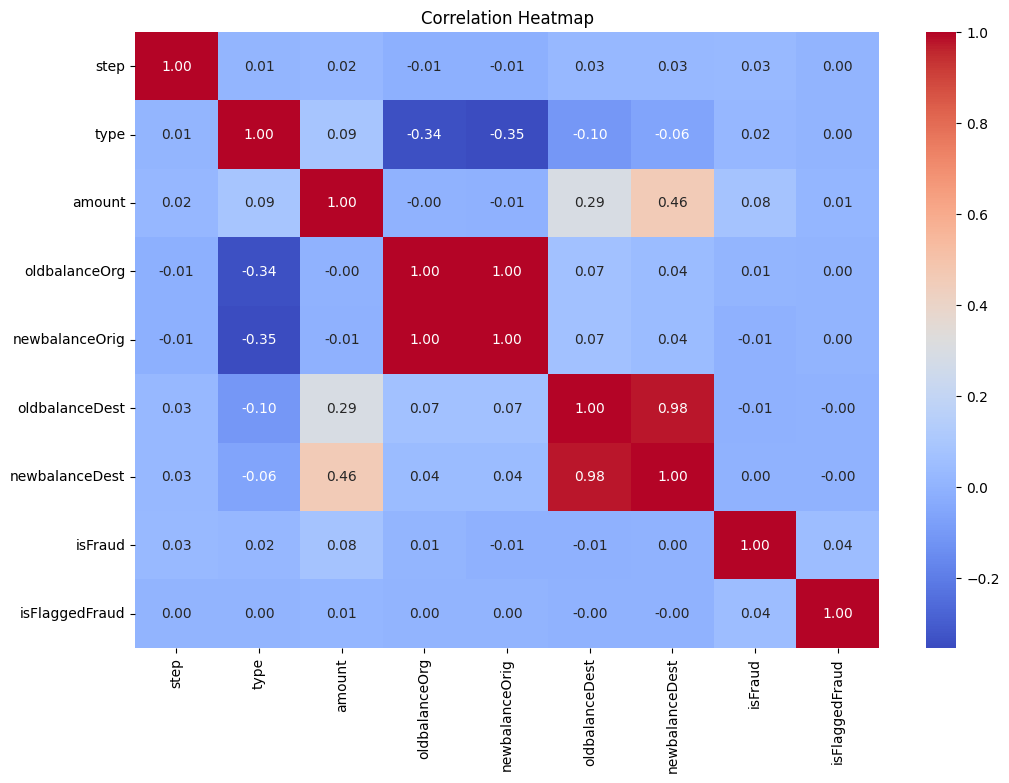

In [13]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()





# **4. Model Development**

**Logistic Regression Performance**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86   1270837
           1       0.93      0.77      0.84   1270926

    accuracy                           0.85   2541763
   macro avg       0.86      0.85      0.85   2541763
weighted avg       0.86      0.85      0.85   2541763



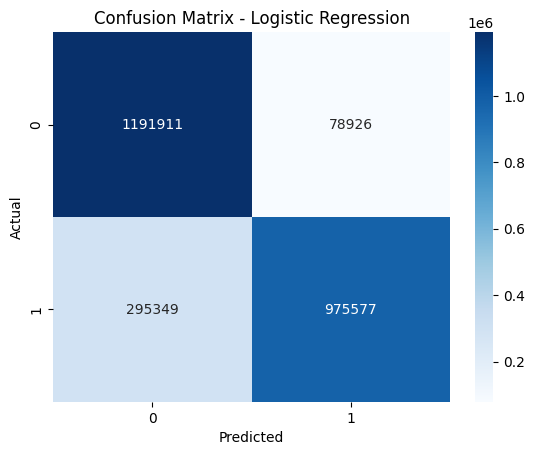

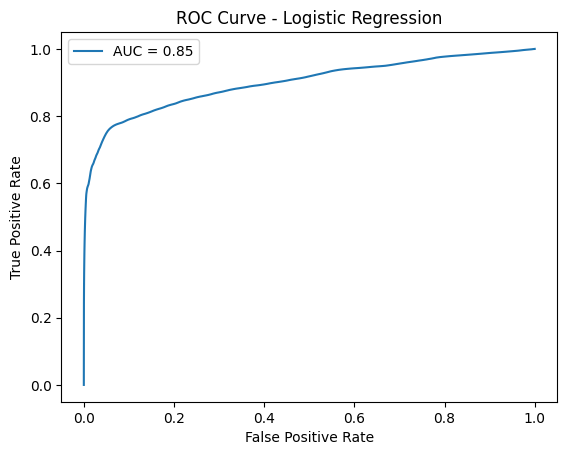

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluation
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_lr):.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


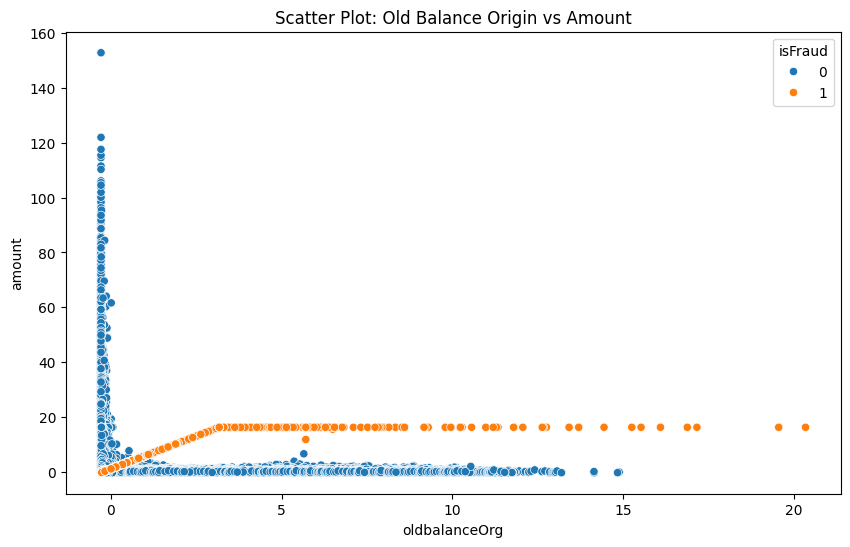

In [15]:
# Scatter plot for outlier detection in amount vs oldbalanceOrg for fraudulent transactions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldbalanceOrg', y='amount', hue='isFraud', data=dataset)
plt.title("Scatter Plot: Old Balance Origin vs Amount")
plt.show()

**Random Forest Classification**

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99   1270837
           1       0.98      0.99      0.99   1270926

    accuracy                           0.99   2541763
   macro avg       0.99      0.99      0.99   2541763
weighted avg       0.99      0.99      0.99   2541763



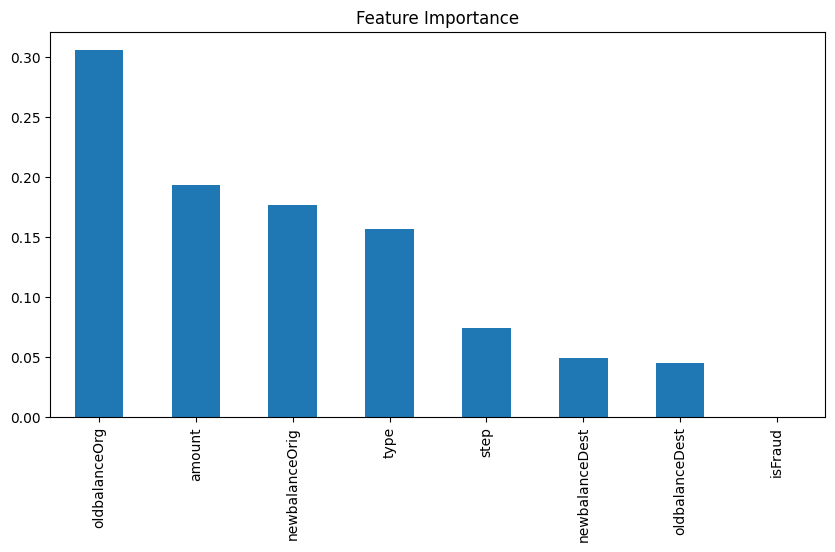

In [16]:
from sklearn.ensemble import RandomForestClassifier

# Reduce the dataset size if necessary
X_train_reduced = X_train.iloc[:100000]  # Use first 100k rows
y_train_reduced = y_train.iloc[:100000]

# Train the model
rf_model.fit(X_train_reduced, y_train_reduced)



y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=dataset.columns[:-1])
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title="Feature Importance")
plt.show()


**Neural Network**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/2
79431/79431 ━━━━━━━━━━━━━━━━━━━━ 234s 3ms/step - accuracy: 0.8612 - loss: 0.3838 - val_accuracy: 0.8619 - val_loss: 0.2770
Epoch 2/2
79431/79431 ━━━━━━━━━━━━━━━━━━━━ 235s 3ms/step - accuracy: 0.9355 - loss: 0.1662 - val_accuracy: 0.9350 - val_loss: 0.1613


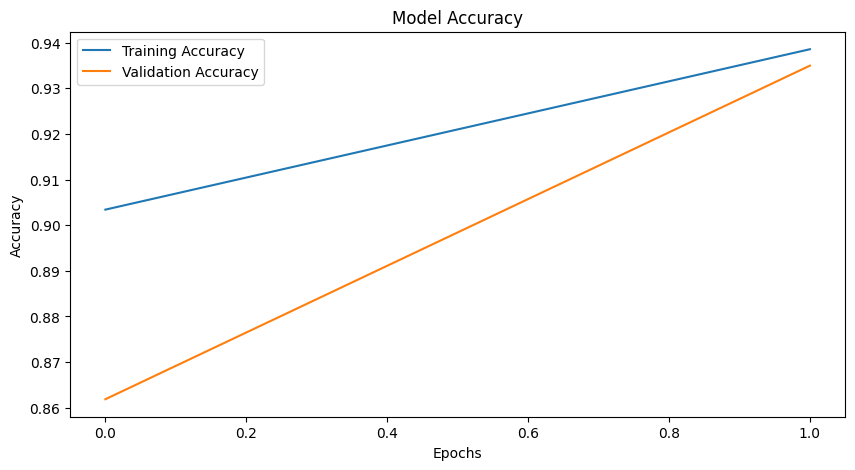

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Build the Neural Network
nn_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile
nn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
# Use a larger batch size
history = nn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128)

# Plot Training History
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


**Evaluate Neural Network**

79431/79431 ━━━━━━━━━━━━━━━━━━━━ 100s 1ms/step
Neural Network ROC AUC: 0.9875571512144823
Neural Network Accuracy: 0.9349856772641666

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94   1270837
           1       0.95      0.92      0.93   1270926

    accuracy                           0.93   2541763
   macro avg       0.94      0.93      0.93   2541763
weighted avg       0.94      0.93      0.93   2541763



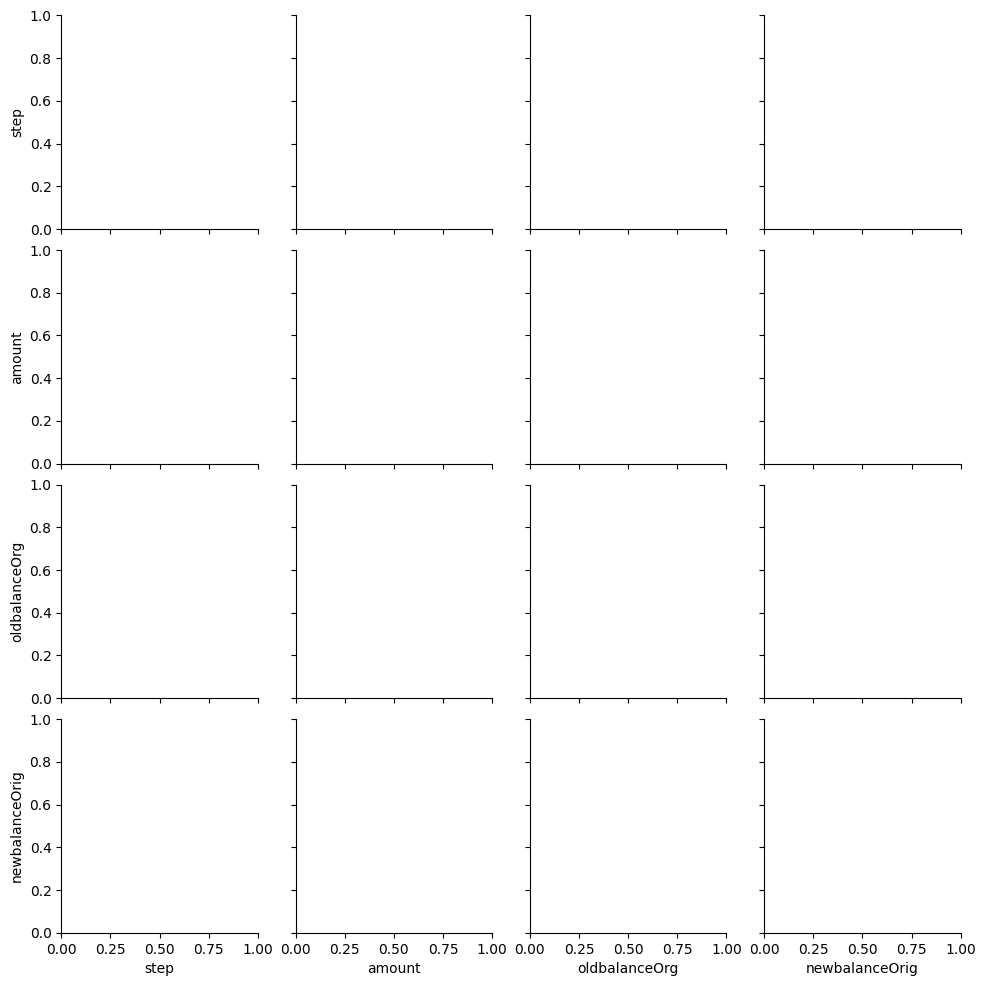

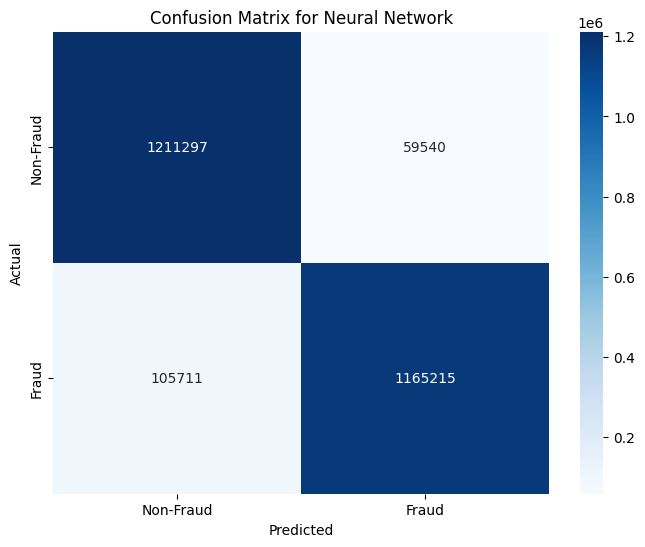

In [61]:
# Evaluate the Neural Network
# Predict probabilities and convert to binary
y_pred_nn_prob = nn_model.predict(X_test)
y_pred_nn = (y_pred_nn_prob > 0.5).astype(int)

# Metrics
auc_nn = roc_auc_score(y_test, y_pred_nn_prob)
accuracy_nn = accuracy_score(y_test, y_pred_nn)

print("Neural Network ROC AUC:", auc_nn)
print("Neural Network Accuracy:", accuracy_nn)
print("\nClassification Report:\n", classification_report(y_test, y_pred_nn))

# Confusion Matrix Visualization
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_nn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix for Neural Network')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [56]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train)
y_pred_kmeans = kmeans.predict(X_test)

# Map KMeans cluster labels to fraud labels (manual adjustment may be needed)
# Assuming cluster 0 is non-fraud and cluster 1 is fraud
y_pred_kmeans = [1 if label == 1 else 0 for label in y_pred_kmeans]

# Evaluate
print("K-Means Clustering Classification Report:")
print(classification_report(y_test, y_pred_kmeans))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_kmeans))


K-Means Clustering Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.25      0.28   1270837
           1       0.38      0.46      0.42   1270926

    accuracy                           0.35   2541763
   macro avg       0.35      0.35      0.35   2541763
weighted avg       0.35      0.35      0.35   2541763

Confusion Matrix:
 [[314188 956649]
 [682976 587950]]


In [58]:
# Subsample the data
sampled_X_train = X_train.sample(frac=0.2, random_state=42)  # Use 20% of the training data
sampled_y_train = y_train.loc[sampled_X_train.index]

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(sampled_X_train, sampled_y_train)
y_pred_dt = dt_model.predict(X_test)

# Evaluate
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270837
           1       1.00      1.00      1.00   1270926

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763

Confusion Matrix:
 [[1268034    2803]
 [   1591 1269335]]


# **5. Advanced Evaluation and Model Comparission**

79431/79431 ━━━━━━━━━━━━━━━━━━━━ 103s 1ms/step


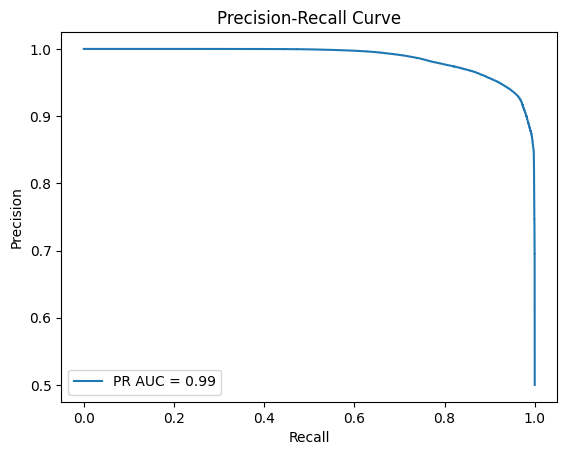

In [63]:
from sklearn.metrics import precision_recall_curve, auc

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, nn_model.predict(X_test))
pr_auc = auc(recall, precision)

plt.plot(recall, precision, label=f"PR AUC = {pr_auc:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()


Model Comparison:
                 Model   ROC AUC  Accuracy
0        Random Forest  0.988972  0.988972
1       Neural Network  0.934986  0.934986
2              K-Means  0.354922  0.354926
3        Decision Tree  0.998271  0.998271
4  Logistic Regression  0.852753  0.852750


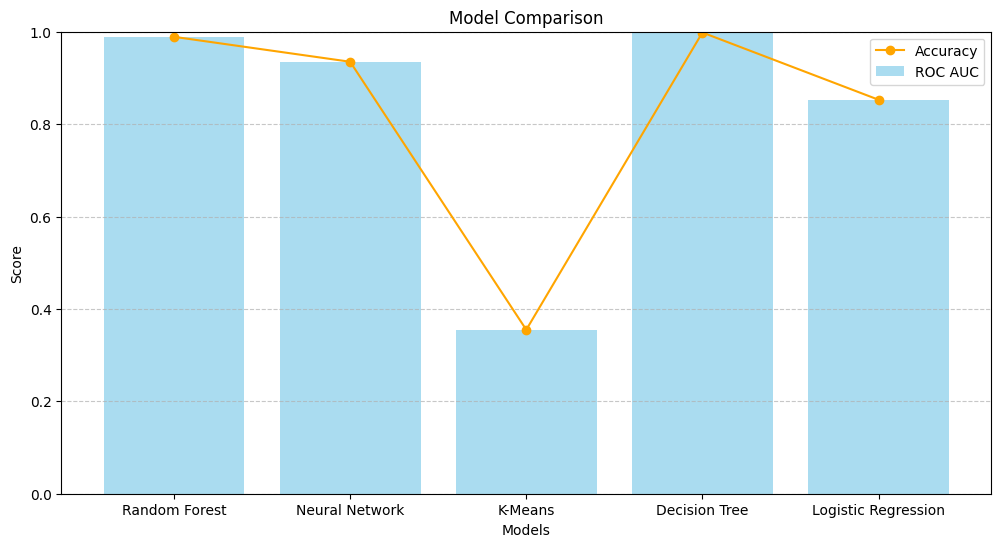

In [62]:
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# Calculate metrics for each model
model_metrics = []

# Random Forest
auc_rf = roc_auc_score(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
model_metrics.append({"Model": "Random Forest", "ROC AUC": auc_rf, "Accuracy": accuracy_rf})

# Neural Network
auc_nn = roc_auc_score(y_test, y_pred_nn)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
model_metrics.append({"Model": "Neural Network", "ROC AUC": auc_nn, "Accuracy": accuracy_nn})

# K-Means
auc_kmeans = roc_auc_score(y_test, y_pred_kmeans)
accuracy_kmeans = accuracy_score(y_test, y_pred_kmeans)
model_metrics.append({"Model": "K-Means", "ROC AUC": auc_kmeans, "Accuracy": accuracy_kmeans})

# Decision Tree
auc_dt = roc_auc_score(y_test, y_pred_dt)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
model_metrics.append({"Model": "Decision Tree", "ROC AUC": auc_dt, "Accuracy": accuracy_dt})

# Logistic Regression
auc_lr = roc_auc_score(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
model_metrics.append({"Model": "Logistic Regression", "ROC AUC": auc_lr, "Accuracy": accuracy_lr})

# Convert to DataFrame
comparison_df = pd.DataFrame(model_metrics)

# Print Results
print("\nModel Comparison:")
print(comparison_df)

# Visualize Comparison
plt.figure(figsize=(12, 6))

# Bar Chart for ROC AUC
plt.bar(comparison_df['Model'], comparison_df['ROC AUC'], color='skyblue', label='ROC AUC', alpha=0.7)

# Add Accuracy as a line plot
plt.plot(comparison_df['Model'], comparison_df['Accuracy'], color='orange', marker='o', label='Accuracy')

plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
